In [2]:
import torch

epochs = 100
lr = 0.00001
train_batch_size = 32
test_batch_size = 1
ck_dir = 'checkpoint/deeplab'
device = torch.device('cuda')

In [3]:
TRAIN_PATH = './skin_leison/training'
TEST_PATH = './skin_leison/testing'

In [4]:
from torch.utils.data import DataLoader

from dataset import Skin_Leison

trainset = Skin_Leison(TRAIN_PATH)
testset = Skin_Leison(TEST_PATH)
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=test_batch_size, num_workers=4)

In [5]:
from torch import nn
from torch.optim import Adam

from models.deeplab_resnet import DeepLabv3_plus_res

net = DeepLabv3_plus_res(n_classes=1).to(device)
optimizer = Adam(net.parameters(), lr=lr)
criterion = nn.BCELoss()

Constructing DeepLabv3+ model...
Number of classes: 1
Output stride: 16
Number of Input Channels: 3


In [6]:
from train import train

result = train(net, trainloader, testloader, epochs, optimizer, criterion, device=device, ck_dir=ck_dir)

Epoch: 0, Train Loss: 0.5835345411300659, Test Loss: 0.5811238276958463
Saving model to checkpoint/deeplab/check0.pt
Epoch: 1, Train Loss: 0.4590033304691315, Test Loss: 0.442917587906122
val_loss improved from 0.5811 to 0.4429, saving model to checkpoint/deeplab/check1.pt
Epoch: 2, Train Loss: 0.39177671074867243, Test Loss: 0.3683497842401265
val_loss improved from 0.4429 to 0.3683, saving model to checkpoint/deeplab/check2.pt
Epoch: 3, Train Loss: 0.35361372590064993, Test Loss: 0.3733742137253286
Epoch: 4, Train Loss: 0.3245779395103455, Test Loss: 0.4062795051187276
Epoch: 5, Train Loss: 0.30702021598815915, Test Loss: 0.324384367465973
val_loss improved from 0.3683 to 0.3244, saving model to checkpoint/deeplab/check5.pt
Epoch: 6, Train Loss: 0.29415614247322086, Test Loss: 0.31686379760503774
val_loss improved from 0.3244 to 0.3169, saving model to checkpoint/deeplab/check6.pt
Epoch: 7, Train Loss: 0.2764682602882385, Test Loss: 0.3186056086048485
Epoch: 8, Train Loss: 0.26950645

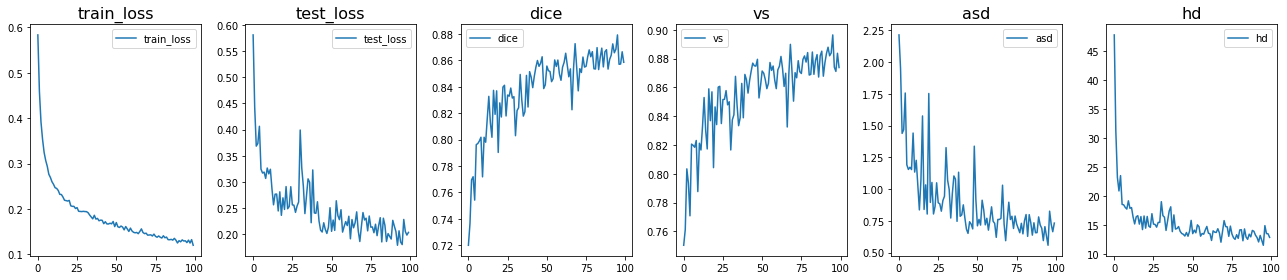

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,4))
keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
for i, (col, key) in enumerate(zip(axes, keys)):
    col.plot(range(len(result[key])), result[key], label=key)
    col.set_title(key, fontsize=16)
    col.legend()
fig.tight_layout()

In [8]:
import json
from pathlib import Path

json_path = Path(ck_dir)/'result.json'
json_path.parent.mkdir(parents=True, exist_ok=True)
with open(json_path, 'w') as fp:
    json.dump(result, fp, sort_keys=True, indent=4)